# Decision and Regression Trees
---

## 1. Decision Trees

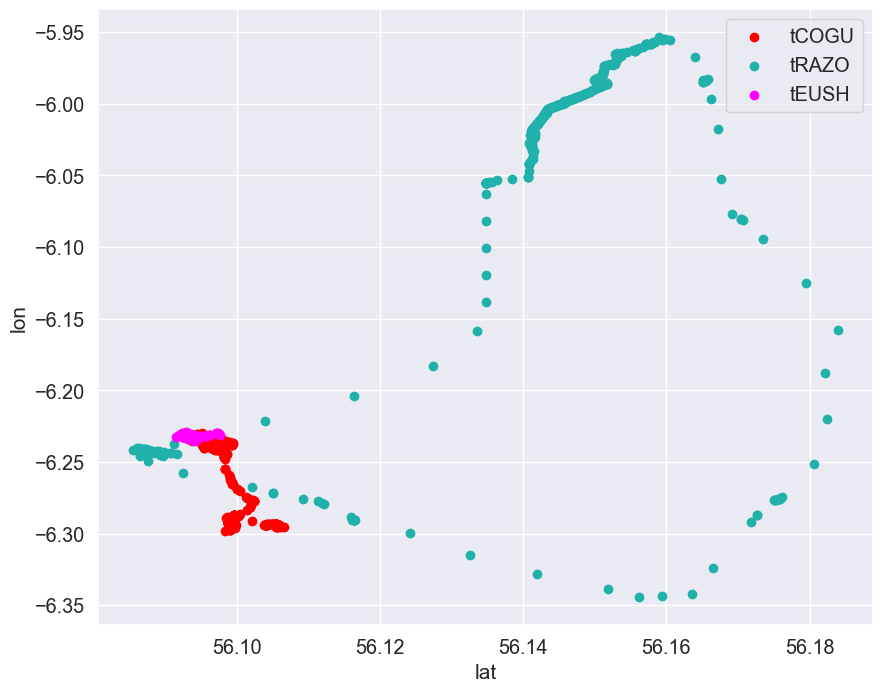

In [168]:
df =  pd.read_csv("Datasets/gps_bird.zip")

df1 = df[df.species == "tCOGU"][:500]
df2 = df[df.species == "tRAZO"][:500]
df3 = df[df.species == "tEUSH"][:500]
df = pd.concat([df1,df2,df3])

species = ["tCOGU","tRAZO","tEUSH"]
colors = ["red","lightseagreen","magenta"]

fig, ax = plt.subplots(figsize = (10, 8))
for sp, color in zip(species, colors):
    temp_df = df[df.species == sp]
    ax.scatter(temp_df.lat,
               temp_df.lon,
               c = color,
               label = sp, 
               )
    
ax.set_xlabel("lat", fontsize = 15)
ax.set_ylabel("lon", fontsize = 15)
ax.legend()
plt.show()

In [169]:
## covert features to numpy array
X = df[['lat', 'lon']].to_numpy()
y = df['species'].to_numpy()

## change species label to numeric label
for i, label in enumerate(y):
    if label == "tCOGU":
        y[i] = 0.0
    elif label == "tRAZO":
        y[i] = 1.0
    else:
        y[i] = 2.0
        
y = y.astype(int)
y

array([0, 0, 0, ..., 2, 2, 2])

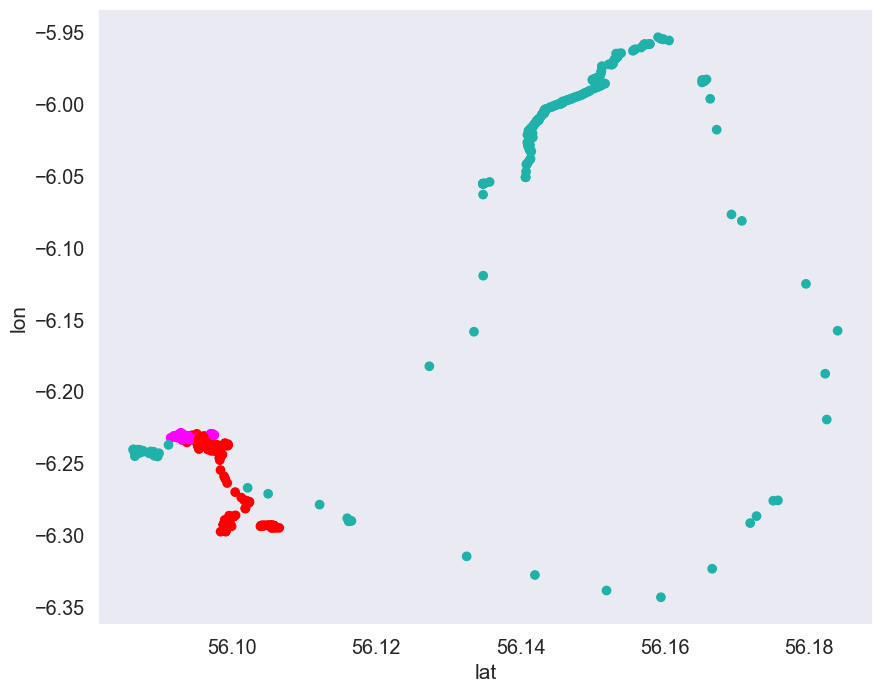

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

c_train = ["red" if label == 0 else ("lightseagreen" if label == 1 else "magenta") for label in y_train]
c_test = ["red" if label == 0 else ("lightseagreen" if label == 1 else "magenta") for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("lat", fontsize = 15)
plt.ylabel("lon", fontsize = 15)
plt.grid()
plt.show()

In [171]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

|--- lat <= 56.11
|   |--- lat <= 56.09
|   |   |--- lon <= -6.24
|   |   |   |--- class: 1
|   |   |--- lon >  -6.24
|   |   |   |--- lat <= 56.09
|   |   |   |   |--- lon <= -6.23
|   |   |   |   |   |--- lon <= -6.23
|   |   |   |   |   |   |--- lon <= -6.23
|   |   |   |   |   |   |   |--- lon <= -6.23
|   |   |   |   |   |   |   |   |--- lat <= 56.09
|   |   |   |   |   |   |   |   |   |--- lon <= -6.23
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- lon >  -6.23
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- lat >  56.09
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- lon >  -6.23
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- lon >  -6.23
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- lon >  -6.23
|   |   |   |   |   |   |--- lat <= 56.09
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |---

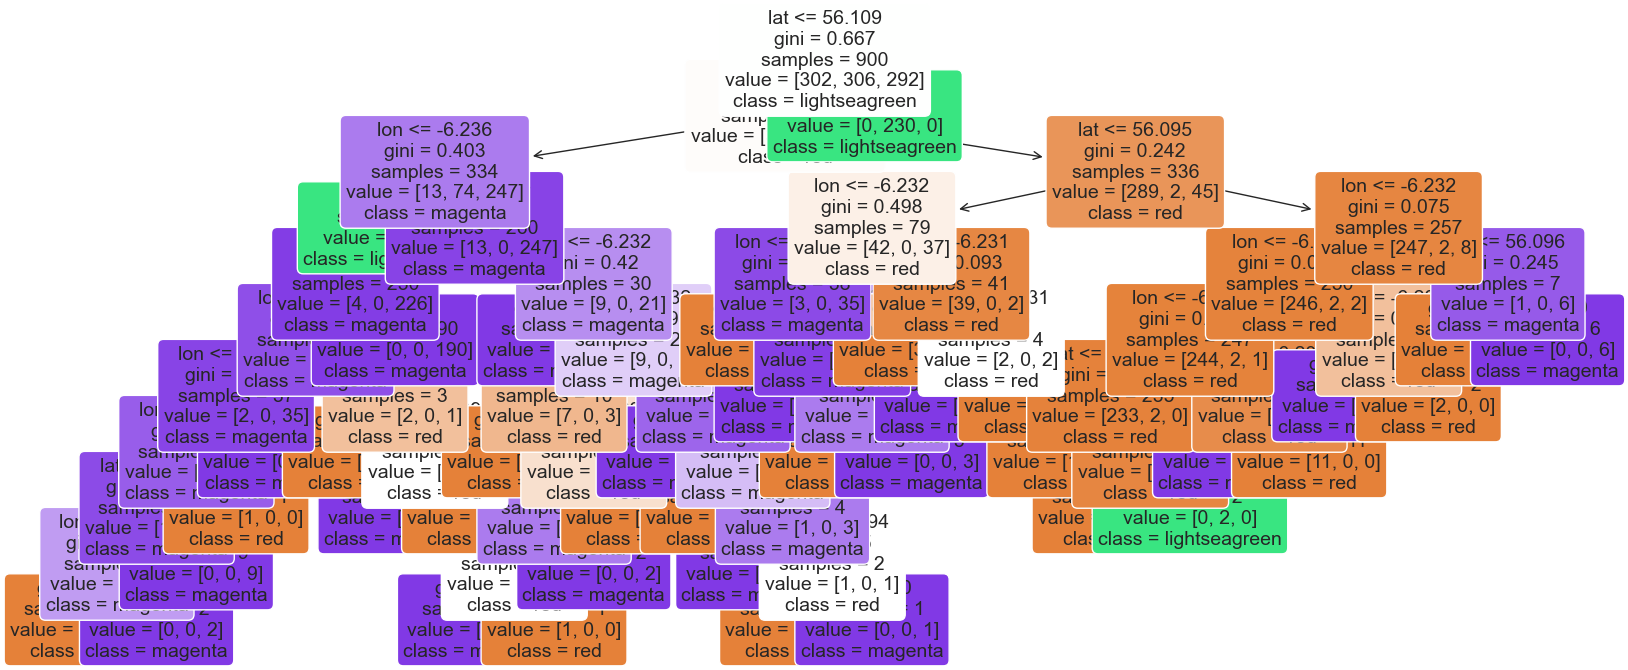

In [172]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["lat", "lon"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["lat", "lon"],
                   class_names = ["red", "lightseagreen","magenta"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

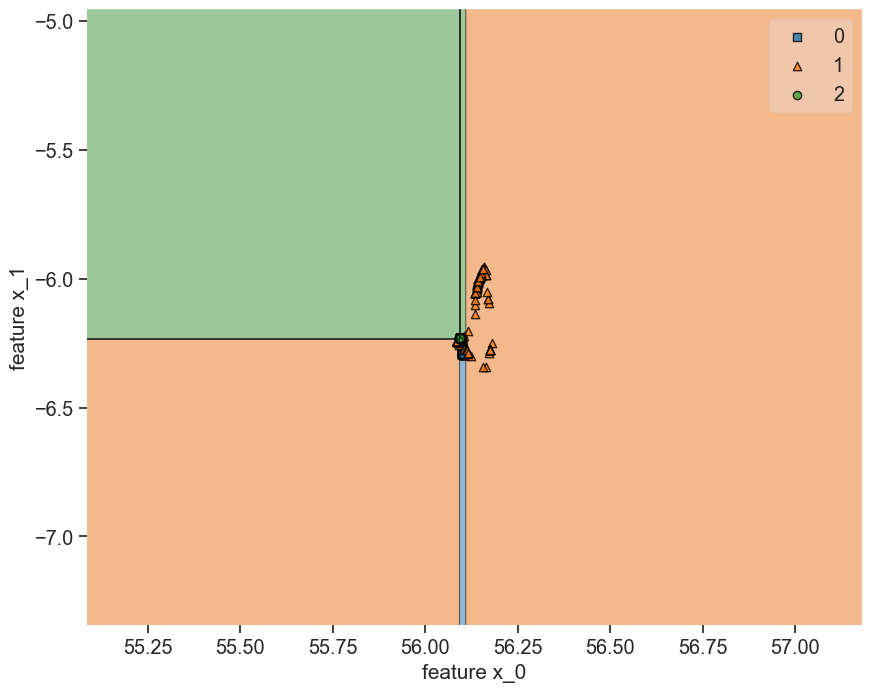

In [173]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X_test, y_test, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

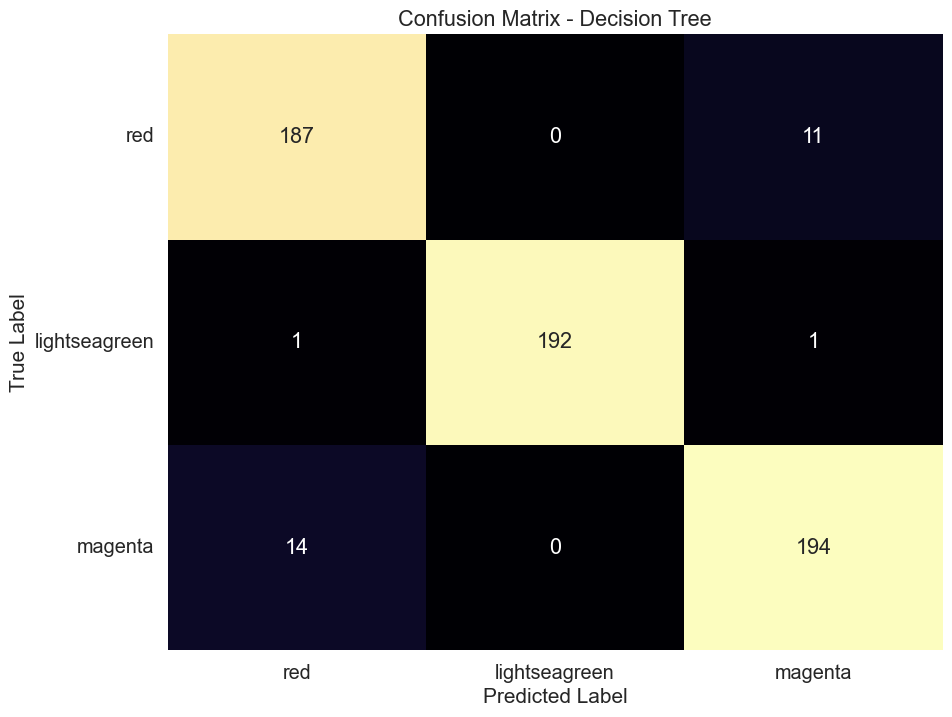

In [174]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(colors)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(colors, rotation=0)
plt.show()

In [138]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       198
           1       1.00      0.99      0.99       194
           2       0.94      0.93      0.94       208

    accuracy                           0.95       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.95      0.96       600



---

## 2. Regression Trees

In [162]:
df =  pd.read_csv("Datasets/gps_bird.zip")

X = df[['lat', 'lon']].to_numpy()
y = df['species'].to_numpy()


## change species label to numeric label
for i, label in enumerate(y):
    if label == "tCOGU":
        y[i] = 0.0
    elif label == "tRAZO":
        y[i] = 1.0
    else:
        y[i] = 2.0

In [163]:
X[0].shape

(2,)

In [164]:
y[0]

0.0

In [165]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [166]:
from sklearn.metrics import mean_squared_error

reg1 = DecisionTreeRegressor(max_depth=1, random_state = 12)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20, random_state = 12)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")


MSE reg1: 0.3452895869881749 

MSE reg2: 0.06839294445268544 



In [167]:
reg1 = DecisionTreeRegressor(max_depth=1)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

MSE reg1: 0.3452895869881749 

MSE reg2: 0.06820107398728911 

